In [30]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('C:/Users/CHANDRU/Desktop/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [32]:
data.shape

(2035, 8)

In [33]:
df = data.sort_index(ascending=False, axis=0)

In [34]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [35]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [36]:
df.drop('Date',axis=1,inplace=True)

In [37]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


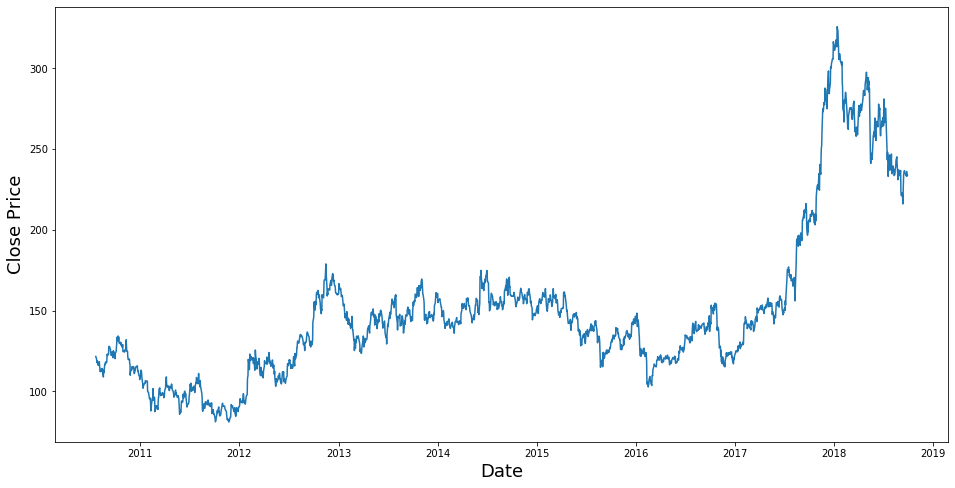

In [38]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [39]:
data = df.filter(['Close'])
dataset = data.values
training_len = math.ceil(len(dataset) * .8)
training_len

1628

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [41]:
train_data = scaled_data[0 : training_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60 :
    print(x_train)
    print(y_train)
    print()

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
       0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
       0.14522059, 0.13521242, 0.12724673, 0.13031046, 0.12806373,
       0.13459967, 0.12908497, 0.13562092, 0.12377451, 0.1190768 ,
       0.11397059, 0.13112745, 0.12479575, 0.14603758, 0.14501634,
       0.14726307, 0.15196078, 0.1503268 , 0.14971405, 0.16156046,
       0.17177288, 0.1693219 , 0.16830065, 0.17238562, 0.19097222,
       0.18913399, 0.19138072, 0.18382353, 0.17544935, 0.17279412,
       0.16830065, 0.17034314, 0.17810458, 0.16973039, 0.16278595,
       0.17401961, 0.18035131, 0.17422386, 0.17116013, 0.16564542,
       0.16033497, 0.17381536, 0.17851307, 0.18811275, 0.19750817,
       0.21425654, 0.21098856, 0.21772876, 0.20445261, 0.21568627])]
[0.21282679738562094]



In [42]:
x_train, y_train = np.array(x_train),np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1568, 60)
(1568,)


In [43]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1568, 60, 1)


In [44]:
model = Sequential()
model.add(LSTM(50, return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
1568/1568 [==============================] - 86s 55ms/step - loss: 7.6037e-04


In [46]:
test_data = scaled_data[training_len - 60: , :]
x_test = []
y_test = dataset[training_len : , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [47]:
x_test = np.array(x_test)
print(x_test.shape)

(407, 60)


In [48]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(407, 60, 1)

In [49]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [50]:
rmse = np.sqrt(np.mean(predictions - y_test)** 2)
rmse

7.749001865246373

In [51]:
train = data[:training_len]
valid = data[training_len:]
valid['predictions'] = predictions

C:\Users\CHANDRU\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


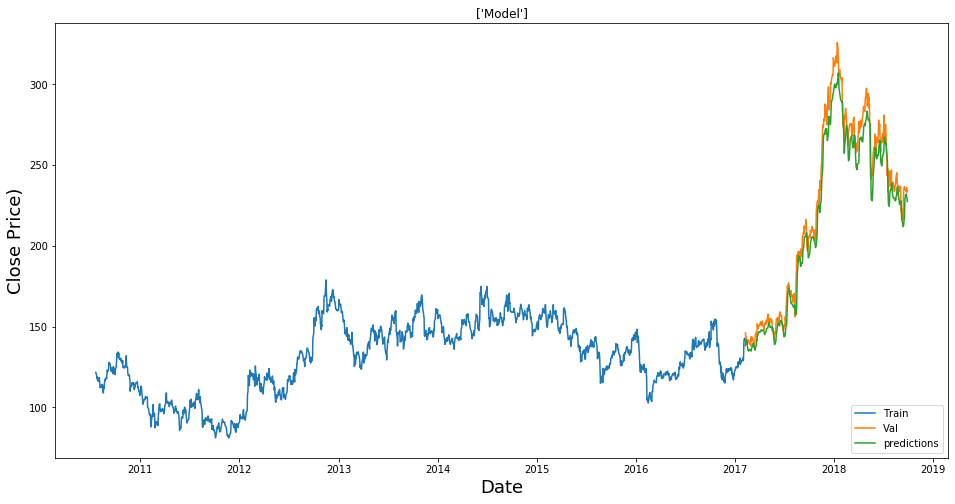

In [52]:
plt.figure(figsize=(16,8))
plt.title(['Model'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'], loc = 'lower right')
plt.show()

In [53]:
valid

,Close,predictions
Date,,
2017-02-08,146.15,138.130035
2017-02-09,143.90,140.567078
2017-02-10,143.95,141.591431
2017-02-13,141.95,141.668167
2017-02-14,141.20,140.619507
...,...,...
2018-09-24,233.30,232.022324
2018-09-25,236.10,230.837830
2018-09-26,234.25,230.122345


In [55]:
new_df = df.filter(['Close'])

In [56]:
new_df.shape

(2035, 1)

In [57]:
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [58]:
X_test = []
X_test.append(last_60_days_scaled)

In [60]:
X_test = np.array(X_test)

In [61]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(1, 60, 1)


In [62]:
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
print(pred)

[[226.37494]]


### On 01/10/2018 the estimated close price is 226.37 but the actual close price is 230.90
